In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [24]:
varied_param = 'producer_topic_interest_func'
varied_param_legend_label = 'Consumer/Producer Interest Function Shallowness'
varied_param_x_label = 'Consumer/Producer Interest Function Shallowness'

In [4]:
num_influencers = 1
num_agents = 8

function_mults = list(np.linspace(0.1, 3, 15))
functions = []
def get_fun(mult):
    return lambda x: inverse_decay(x, mult, 2)
for mult in function_mults:
    functions.append(get_fun(mult))

varied_param_values = function_mults

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=functions,
    consumer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=10,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing influencer 8
Optimizing producer 0
Optimization succeeded (overall 0.003503457992337644s): nit=4, nfev=14, njev=7.
Optimizing producer 1
Optimization succeeded (overall 0.0019610000017564744s): nit=2, nfev=8, njev=4.
Optimizing producer 2
Optimization succeeded (overall 0.002989999979035929s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.003654250002000481s): nit=4, nfev=14, njev=7.
Optimizing producer 4
Optimization succeeded (overall 0.0021347079891711473s): nit=2, nfev=8, njev=4.
Optimizing producer 5
Optimization succeeded (overall 0.002888124989112839s): nit=2, nfev=8, njev=4.
Optimizing producer 6
Optimization succeeded (overall 0.00290250001125969s): nit=4, nfev=12, njev=6.
Optimizing producer 7
Optimization succeeded (overall 0.0019336249970365316s): nit=2, nf

In [6]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

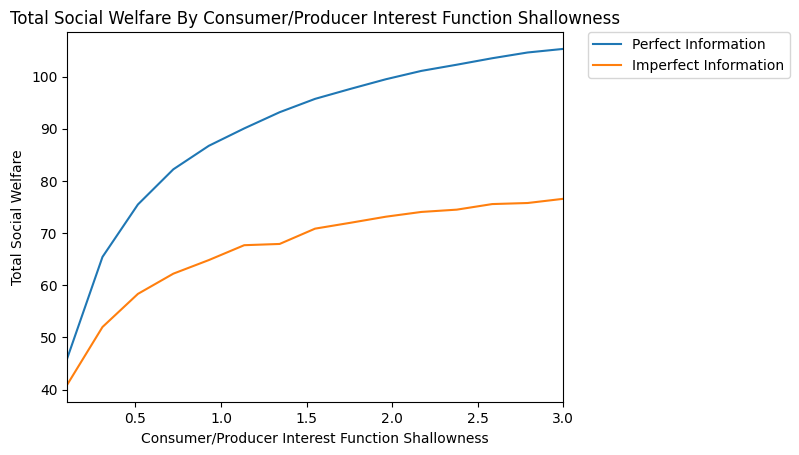

In [25]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

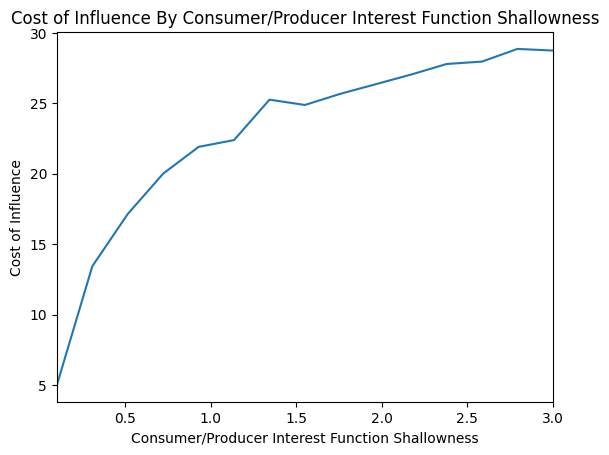

In [26]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

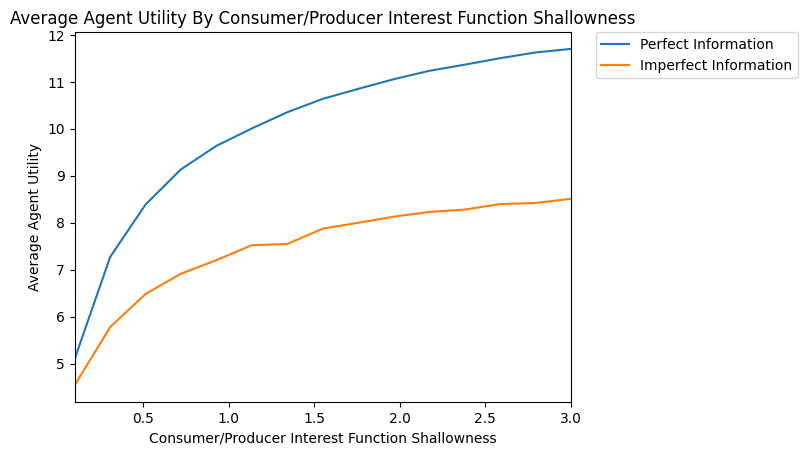

In [27]:
visualize.plot_ending_value_by_test(f"Average Agent Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_agent_utility', varied_param_values, varied_param_x_label, 'Average Agent Utility')

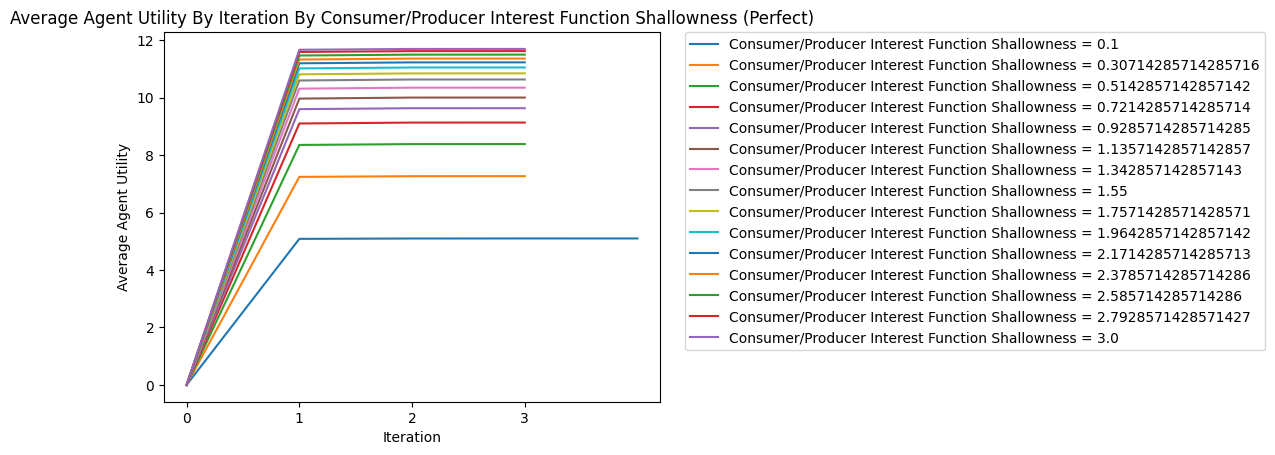

In [28]:
if len(perfect_info_stats) > 0:
    visualize.plot_value_by_iteration_by_test(f"Average Agent Utility By Iteration By {varied_param_x_label} (Perfect)", perfect_info_stats, 'average_agent_utility', varied_param_legend_label, varied_param_values, 'Average Agent Utility')

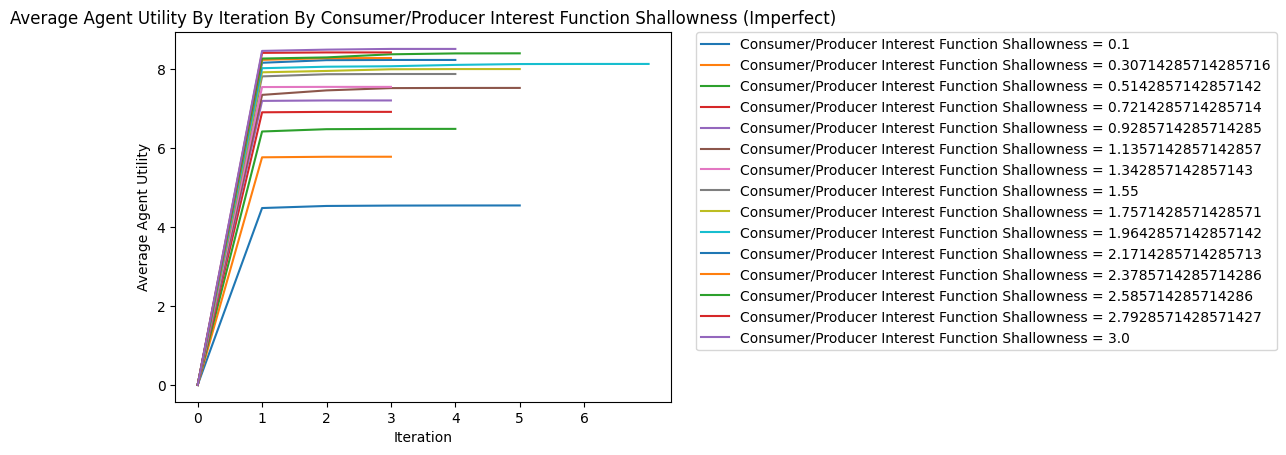

In [29]:
if len(imperfect_info_stats) > 0:
    visualize.plot_value_by_iteration_by_test(f"Average Agent Utility By Iteration By {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'average_agent_utility', varied_param_legend_label, varied_param_values, 'Average Agent Utility')

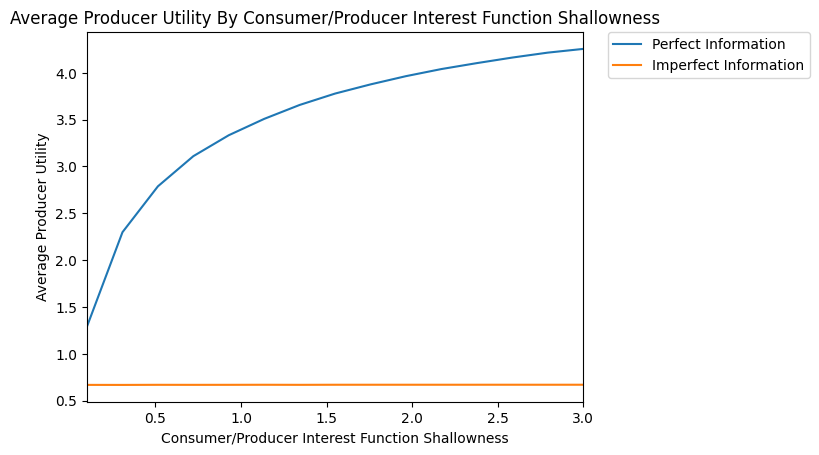

In [30]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

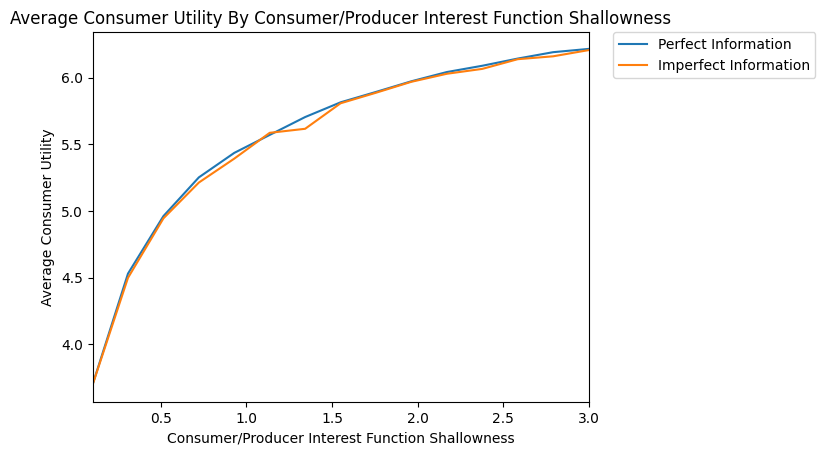

In [31]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

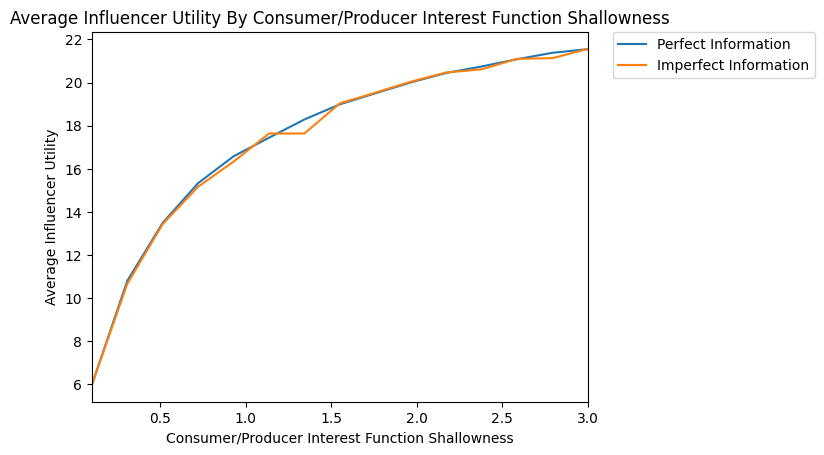

In [32]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

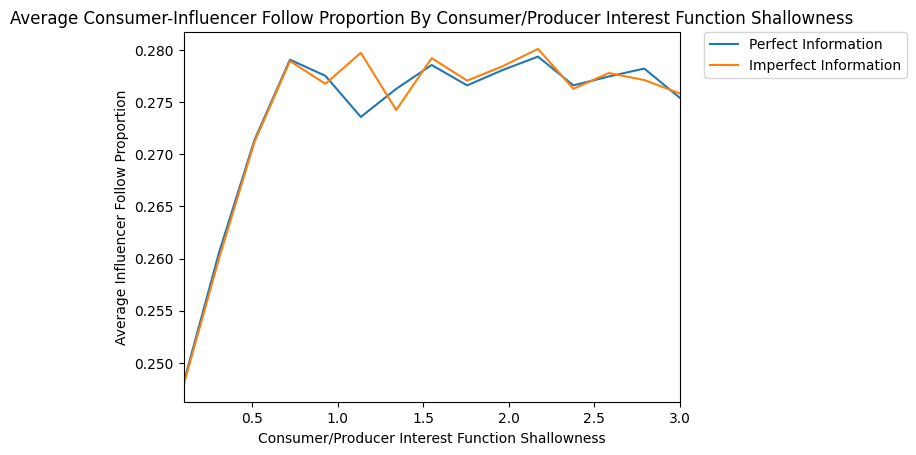

In [33]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

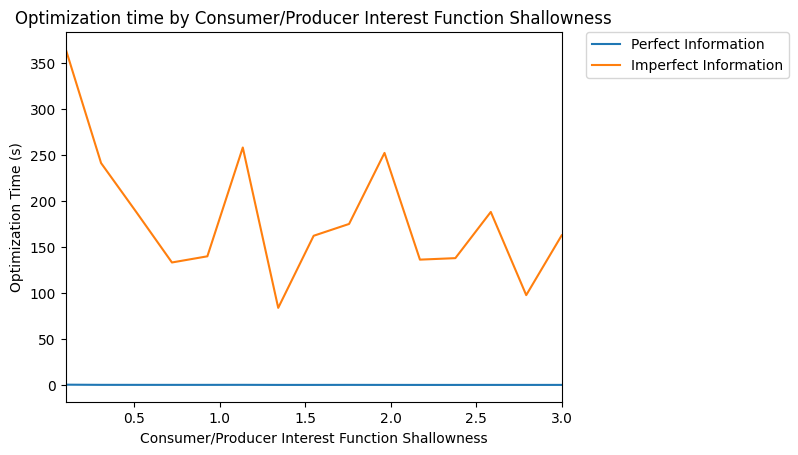

In [34]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

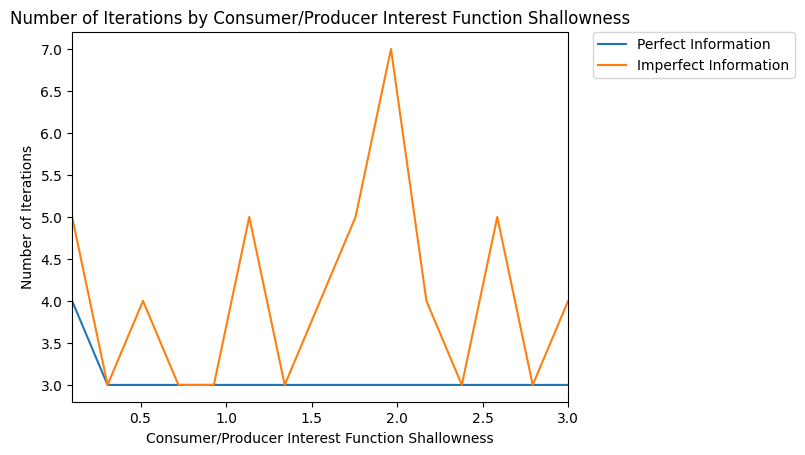

In [35]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

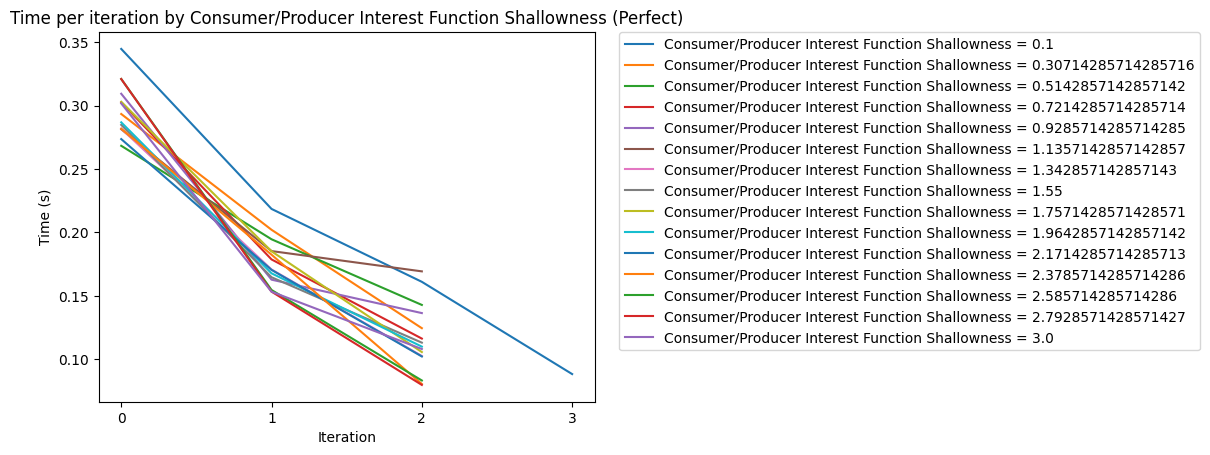

In [36]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

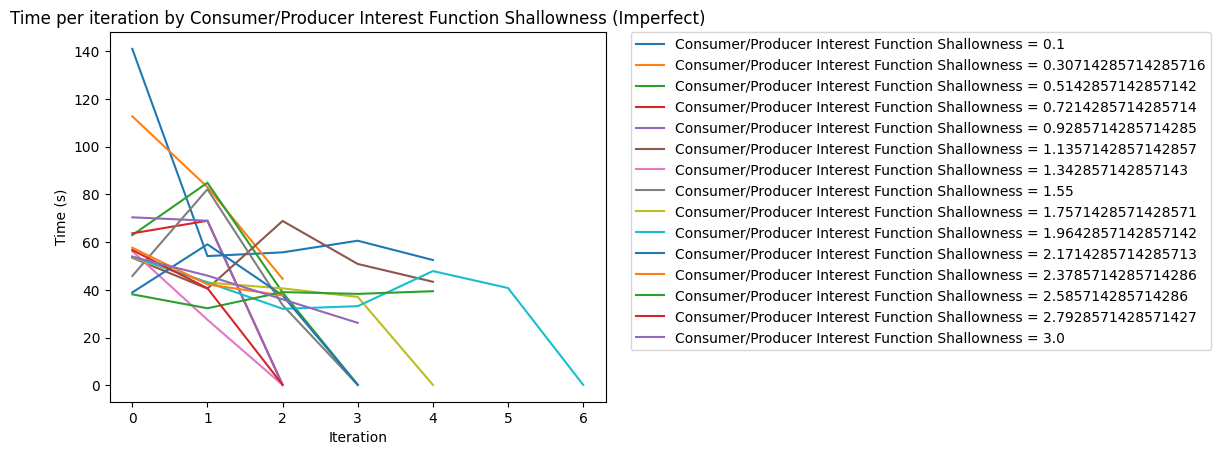

In [37]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

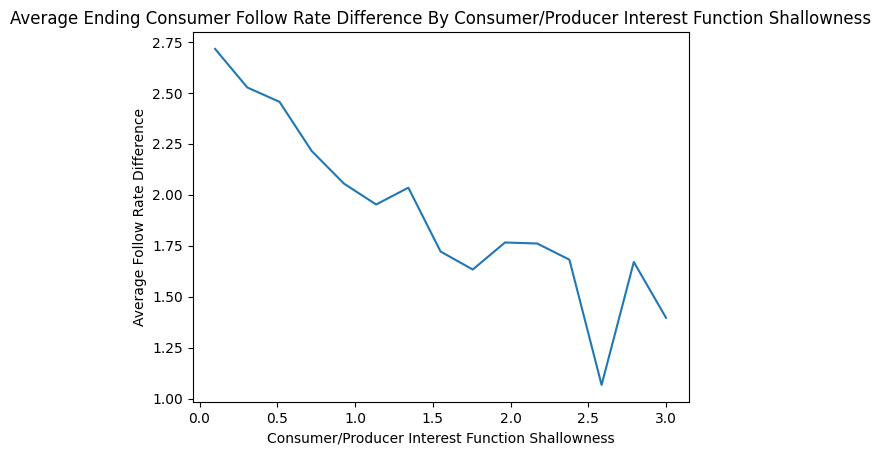

In [38]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

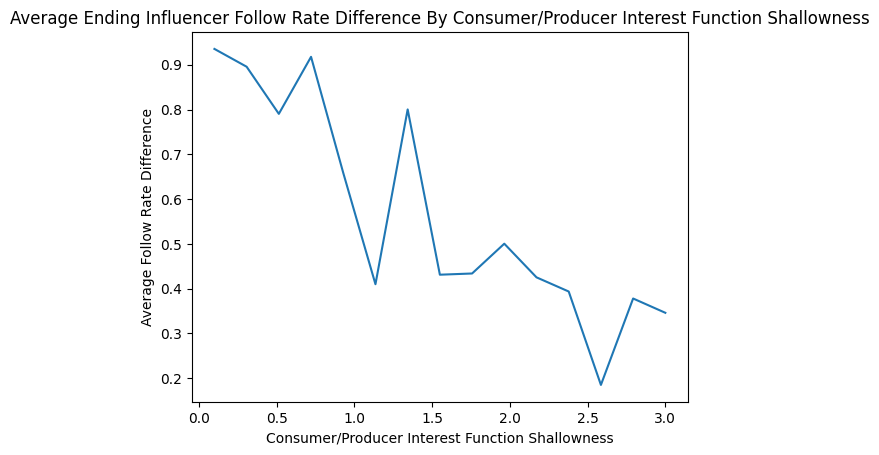

In [39]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

In [ ]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1])
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

In [22]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 4, 'total_consumer_utility': [0, 29.551024672349673, 29.578700329427107, 29.58101482913214, 29.581325624448382], 'total_producer_utility': [0, 10.272778910117417, 10.340224880574183, 10.352597885910912, 10.350852194739947], 'total_influencer_utility': [0, 5.955757470946497, 5.973188238271016, 5.978048290250742, 5.975876515761445], 'total_social_welfare': [0, 45.77956105341359, 45.892113448272305, 45.911661005293794, 45.90805433494977], 'average_consumer_rate_change': [0, 4.525103199995817, 0.21291052503177307, 0.09064705283522212, 0.021249126746277276], 'average_producer_topic_change': [0, 0.05634291712062227, 0.012032387316239745, 0.003213938075095686, 0.0016429122889047576], 'average_influencer_rate_change': [0, 0.926281436829571, 0.3106555302641747, 0.0, 0.0], 'average_consumer_utility_change': [0, 3.6938780840437087, 0.0034594571346792113, 0.0002893124631296873, 3.884941452997337e-05], 'average_producer_utility_change': [0, 1.284097363764677, 0.008430746307095685

In [23]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 5, 'total_consumer_utility': [0, 29.221736523252044, 29.50415231477252, 29.550058256207688, 29.56273992724477, 29.564686532727745], 'total_producer_utility': [0, 5.329685304783364, 5.346069659736729, 5.3475217465277405, 5.348098937292512, 5.348098937292512], 'total_influencer_utility': [0, 5.76010435625366, 5.935154928093644, 5.971639712416375, 5.981145542475835, 5.986002878436565], 'total_social_welfare': [0, 40.311526184289065, 40.78537690260289, 40.86921971515181, 40.89198440701312, 40.89878834845682], 'average_consumer_rate_change': [0, 4.525103170260893, 0.10577884054879999, 0.11985361861909317, 0.023232935424737963, 0.0031360945379776263], 'average_producer_topic_change': [0, 0.011688439174918585, 0.031148458960098574, 0.007286494817643645, 0.0050894073755409185, 0.006594062891774128], 'average_influencer_rate_change': [0, 0.9262811455612426, 0.025890183558802543, 0.2687545344377437, 0.03781839427333387, 0.017051048353139864], 'average_consumer_utility_change':